In [37]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime

### 载入数据

In [9]:
amazon_data = pdr.get_data_yahoo('AMZN')

In [11]:
amazon_data.shape

(1259, 6)

In [12]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-08-10 to 2020-08-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   int64  
 5   Adj Close  1259 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [13]:
amazon_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-10,532.280029,523.000000,528.520020,524.000000,2615900,524.000000
2015-08-11,528.979980,522.000000,523.650024,527.460022,2676600,527.460022
2015-08-12,527.500000,513.059998,523.750000,525.909973,3962300,525.909973
2015-08-13,534.659973,525.489990,527.369995,529.659973,2895200,529.659973
2015-08-14,534.109985,528.250000,528.250000,531.520020,1994800,531.520020


### 数据预处理与特征提取

In [20]:
df = amazon_data['Open'].values

In [21]:
df.shape

(1259,)

In [22]:
df = df.reshape(-1,1)

In [23]:
df.shape

(1259, 1)

In [24]:
df

array([[ 528.52001953],
       [ 523.65002441],
       [ 523.75      ],
       ...,
       [3143.77001953],
       [3194.36010742],
       [3224.01000977]])

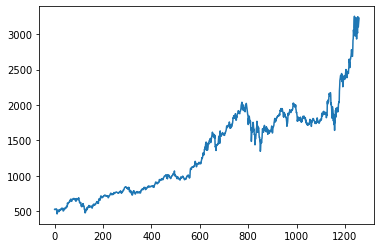

In [25]:
plt.plot(df)
plt.show()

In [33]:
data_train = np.array(df[:int(df.shape[0]*0.8)])
data_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [35]:
data_train.shape

(1007, 1)

In [36]:
data_test.shape

(302, 1)

In [38]:
def create_dataset(df):
    x=[]
    y=[]
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x, y
x_train, y_train = create_dataset(data_train)
x_test, y_test = create_dataset(data_test)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(957, 50)
(957,)
(252, 50)
(252,)


In [42]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [43]:
print(x_train.shape)

(957, 50, 1)


### 建立模型

In [47]:
model = Sequential()

model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

### 模型训练

In [48]:
model.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
957/957 [==============================] - 10s 11ms/step - loss: 1616629.6725
Epoch 2/50
957/957 [==============================] - 6s 6ms/step - loss: 1598922.0104
Epoch 3/50
957/957 [==============================] - 6s 6ms/step - loss: 1590747.6889
Epoch 4/50
957/957 [==============================] - 6s 6ms/step - loss: 1583324.9572
Epoch 5/50
957/957 [==============================] - 6s 6ms/step - loss: 1576144.1181A: 2s - loss:
Epoch 6/50
957/957 [==============================] - 6s 6ms/step - loss: 1569019.7543
Epoch 7/50
957/957 [==============================] - 6s 6ms/step - loss: 1561966.9918
Epoch 8/50
957/957 [==============================] - 6s 6ms/step - loss: 1554988.7612
Epoch 9/50
957/957 [==============================] - 6s 6ms/step - loss: 1548064.7559
Epoch 10/50
957/957 [==============================] - 6s 6ms/step - loss: 1541660.2190
Epoch 11/50
957/957 [==============================] - 6s 6ms/step - loss: 1534665.4974
Epoch 12/50
957/957 [=====

### 模型评估

In [49]:
pre = model.predict(x_test)

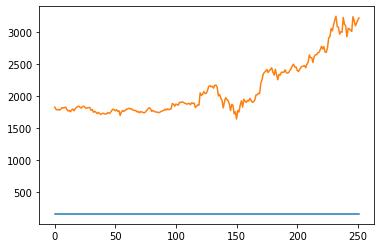

In [50]:
plt.plot(pre)
plt.plot(y_test)
plt.show()